## Imports

In [137]:
import pandas as pd
import glob
import datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Read Data

In [138]:
wiki_data = pd.read_csv("../../data/wikidata/wikipedia-articles-per-lang-june-2022.tsv", sep="\t")

In [139]:
wiki_data = wiki_data.rename(columns={'lang': 'language'})

In [140]:
wiki_data.head()

,code,language,June_2022_article_count,June_2022_date,Url
0,bg:,Bulgarian,"282,130",6/14/2022,https://web.archive.org/web/20220614194239/htt...
1,ca:,Catalan,"702,281",6/14/2022,https://web.archive.org/web/20220614194621/htt...
2,cs:,Czech,"505,105",6/14/2022,https://web.archive.org/web/20220614015357/htt...
3,da:,Danish,"280,923",6/14/2022,https://web.archive.org/web/20220614020329/htt...
4,de:,German,"2,698,267",6/15/2022,https://web.archive.org/web/20220615000601/htt...


In [141]:
entity_analysis_df = pd.read_csv("../../data/error_analysis/entity_analysis_language_and_accuracy_by_entity.csv")

In [142]:
entity_analysis_df.head()

,entity,num_correct,num_incorrect,total_usages,percent_accuracy,languages,num_languages,alternate_forms,dataset_ids
0,Prius,16,0,16,1.000000,"{'sr': 1, 'uk': 1, 'nl': 1, 'sv': 1, 'ca': 1, ...",16,"{'sr': 'Приус', 'uk': 'Prius', 'nl': 'Prius', ...",['calinet_8922']
1,Sundar Pichai,18,1,19,0.947368,"{'sr': 1, 'uk': 1, 'nl': 1, 'sv': 1, 'ca': 1, ...",19,"{'sr': 'Сундар Пицхаи', 'uk': 'Сундар Пічаї', ...",['rome_5025']
2,People's Republic of China,17,0,17,1.000000,"{'sr': 1, 'uk': 1, 'nl': 1, 'sv': 1, 'hu': 1, ...",17,"{'sr': 'Народна Република Кина', 'uk': 'Народн...",['rome_21333']
3,Sint Maarten,11,10,21,0.523810,"{'sr': 1, 'nl': 2, 'sv': 1, 'ca': 1, 'pl': 1, ...",14,"{'sr': 'Синт Маартен', 'nl': 'Sint Maarten', '...","['rome_8738', 'rome_20596']"
4,Haas House,9,5,14,0.642857,"{'sr': 1, 'nl': 1, 'sv': 1, 'hu': 1, 'ca': 1, ...",14,"{'sr': 'Хаас Хоусе', 'nl': 'Haas House', 'sv':...",['rome_8783']


In [143]:
llama_summary_df = pd.read_csv("../../data/result_logs/llama-30b/results//llama-fact-completion-benchmark-results.csv")

In [144]:
llama_summary_df.head()

,language,accuracy,uncertainty,num_pairs
0,English,89.40,0.38,26254
1,German,85.74,0.53,16287
2,Dutch,85.35,0.46,25590
3,Italian,84.39,0.49,20448
4,French,84.18,0.52,18395


## is there a connection bt wikipedia size and accuracy?

In [145]:
agg_df = pd.merge(wiki_data, llama_summary_df, on='language', how='inner')[['code', 'language', 'June_2022_article_count', 'accuracy', 'uncertainty', 'num_pairs']]

In [146]:
agg_df.head()

,code,language,June_2022_article_count,accuracy,uncertainty,num_pairs
0,bg:,Bulgarian,"282,130",72.50,0.61,20577
1,ca:,Catalan,"702,281",84.01,0.52,18898
2,cs:,Czech,"505,105",77.94,0.84,9427
3,da:,Danish,"280,923",81.79,0.50,23365
4,de:,German,"2,698,267",85.74,0.53,16287


In [147]:
int('282,130'.replace(',', ''))

282130

In [148]:
agg_df['June_2022_article_count'] = [int(c.replace(',', '')) for c in list(agg_df['June_2022_article_count'])]

In [149]:
agg_df['accuracy'] = [float(c) for c in list(agg_df['accuracy'])]

first let's just graph the size of wikipedia per language

In [150]:
stats = agg_df[['language', 'June_2022_article_count']].sort_values(by='June_2022_article_count', ascending=True)

In [151]:
stats

,language,June_2022_article_count
16,Slovenian,176565
8,Croatian,212088
3,Danish,280923
0,Bulgarian,282130
14,Romanian,431067
2,Czech,505105
9,Hungarian,505754
17,Serbian,659580
1,Catalan,702281
13,Portuguese,1093217


### Size of wikipedia per language

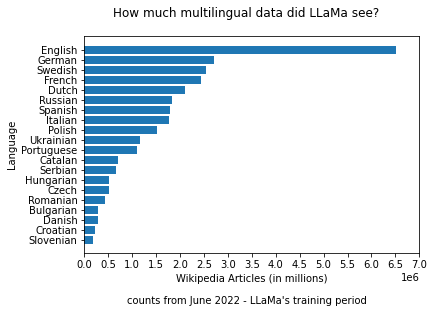

In [152]:
plt.barh('language', 'June_2022_article_count', data=stats)

plt.suptitle("How much multilingual data did LLaMa see?")
plt.xlabel("Wikipedia Articles (in millions)")
plt.ylabel("Language")
plt.xticks(range(0, max(stats['June_2022_article_count']) + 500000, 500000))

# label the bars with the number of articles
#for i, v in enumerate(stats['June_2022_article_count']):
#    plt.text(v + 1000, i, str(v), color='blue', fontweight='bold')

txt="counts from June 2022 - LLaMa's training period"
plt.figtext(0.5, -.05, txt, wrap=True, horizontalalignment='center', fontsize=10)

# display the plot
plt.show()

### connection bt accuracy and wikipedia size?

In [153]:
stats = agg_df[['language', 'accuracy', 'code', 'June_2022_article_count']]

In [154]:
stats['code'] = [c[:-1] for c in stats['code']]

/var/folders/02/16ydl6kx7wnfv5434ztsylf40000gn/T/ipykernel_6297/319015839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['code'] = [c[:-1] for c in stats['code']]


In [155]:
stats

,language,accuracy,code,June_2022_article_count
0,Bulgarian,72.50,bg,282130
1,Catalan,84.01,ca,702281
2,Czech,77.94,cs,505105
3,Danish,81.79,da,280923
4,German,85.74,de,2698267
5,English,89.40,en,6513291
6,Spanish,81.74,es,1782912
7,French,84.18,fr,2430636
8,Croatian,76.69,hr,212088
9,Hungarian,75.74,hu,505754


In [159]:
stats["accuracy"].corr(stats["June_2022_article_count"])

0.5101122613323459

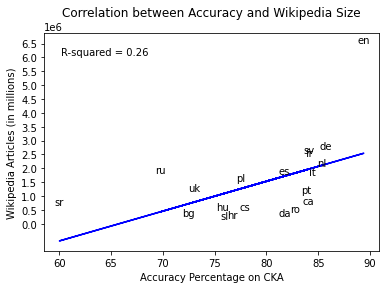

In [157]:

plt.title("Correlation between Accuracy and Wikipedia Size")
plt.scatter(stats["accuracy"], stats["June_2022_article_count"], facecolors='none', edgecolors='none')

plt.xlabel("Accuracy Percentage on CKA")
plt.ylabel("Wikipedia Articles (in millions)")

plt.yticks(range(0, max(stats['June_2022_article_count']) + 500000, 500000))

# add trendline
slope, intercept, r_value, p_value, std_err = linregress(stats["accuracy"], stats["June_2022_article_count"])
plt.plot(stats["accuracy"], intercept + slope * stats["accuracy"], "b")

# add legend with r-squared value
r_squared = r_value ** 2
plt.annotate("R-squared = {:.2f}".format(r_squared), xy=(0.05, 0.9), xycoords='axes fraction')

for i, txt in enumerate(stats['code']):
    plt.annotate(txt, (stats["accuracy"][i], stats["June_2022_article_count"][i]), ha='center')

plt.show()

In [161]:
stats['regression_outcome'] = np.where(stats["June_2022_article_count"] > intercept + slope * stats["accuracy"], "above", "below")

/var/folders/02/16ydl6kx7wnfv5434ztsylf40000gn/T/ipykernel_6297/1185136644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['regression_outcome'] = np.where(stats["June_2022_article_count"] > intercept + slope * stats["accuracy"], "above", "below")


In [163]:
stats.sort_values("regression_outcome")

,language,accuracy,code,June_2022_article_count,regression_outcome
19,Ukrainian,73.00,uk,1160183,above
17,Serbian,60.01,sr,659580,above
15,Russian,69.72,ru,1828011,above
4,German,85.74,de,2698267,above
5,English,89.40,en,6513291,above
6,Spanish,81.74,es,1782912,above
7,French,84.18,fr,2430636,above
18,Swedish,84.06,sv,2551218,above
12,Polish,77.50,pl,1525414,above
16,Slovenian,75.99,sl,176565,below
